In [42]:
import pandas as pd
import numpy as np

from utils import convert_tsf_to_dataframe, describe_ts, draw_resampled, cluster_ts, plot_clustered_series, calculate_tau, calculate_slope

In [76]:
def melt_segment(segment, id_column="id", value_column="value", date_column="date"):
    n_values = len(segment["value"].values[0])
    df_dict = {
        "id": np.repeat(segment[id_column].iloc[0], n_values),
        "date": pd.date_range(segment[date_column].iloc[0], periods=n_values, freq="MS"),
        "value": segment[value_column].values[0]
    }
    return pd.DataFrame(df_dict)

In [71]:
fred_md = convert_tsf_to_dataframe('data/monash/fred_md_dataset.tsf')[0]
fred_md = fred_md.rename(columns={'series_name': 'id', 'start_timestamp': 'date'})
fred_md["date"] = pd.to_datetime(fred_md["date"])
fred_md['id'] = fred_md['id'].astype('category').cat.codes

In [73]:
new_df_list = []
for _, segment in fred_md.groupby("id"):
    new_df_list.append(melt_segment(segment))

In [74]:
fred_md = pd.concat(new_df_list)

In [75]:
fred_md

,id,date,value
0,0,1959-01-01,2437.296
1,0,1959-02-01,2446.902
2,0,1959-03-01,2462.689
3,0,1959-04-01,2478.744
4,0,1959-05-01,2493.228
...,...,...,...
723,106,2019-04-01,109.403
724,106,2019-05-01,109.511
725,106,2019-06-01,109.653
726,106,2019-07-01,109.914


Приведем основные необходимые характеристики ряда.

In [77]:
describe_ts(fred_md)

Число рядов: 107
Наблюдений в ряде: [728]
Минимальная дата в ряде: 1959-01-01 00:00:00
Максимальная дата в ряде: 2019-08-01 00:00:00, 

count    7.789600e+04
mean     1.907781e+04
std      1.072463e+05
min     -3.335210e+05
25%      1.940540e+01
50%      1.010682e+02
75%      1.789000e+03
max      2.841761e+06
Name: value, dtype: float64


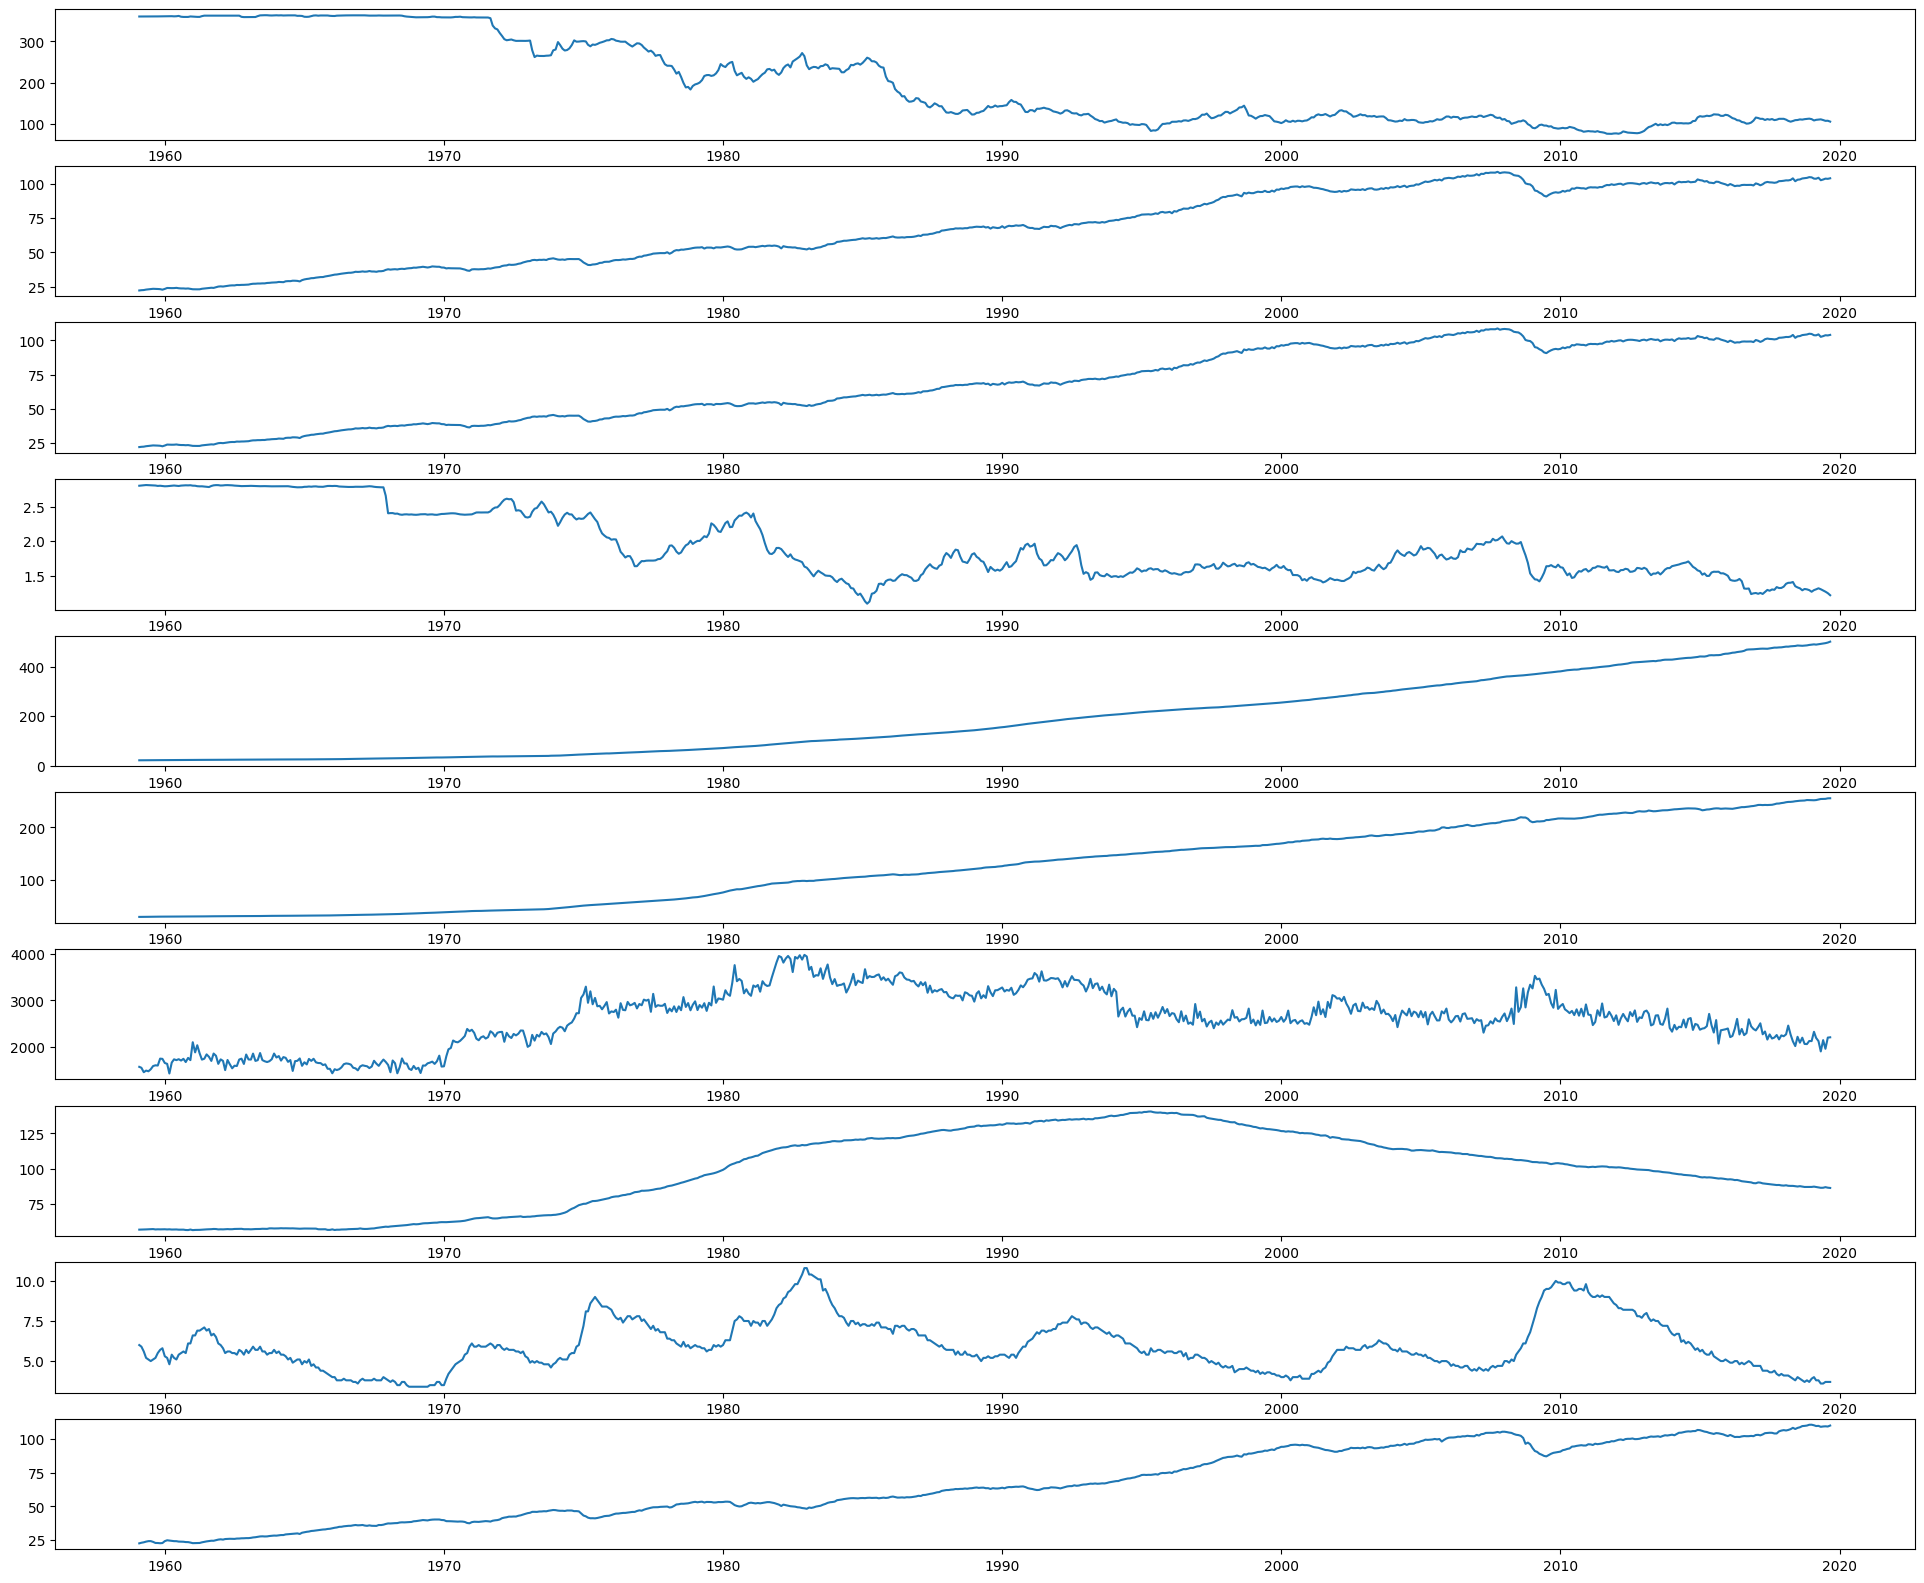

In [78]:
draw_resampled(fred_md, 'M', 10)

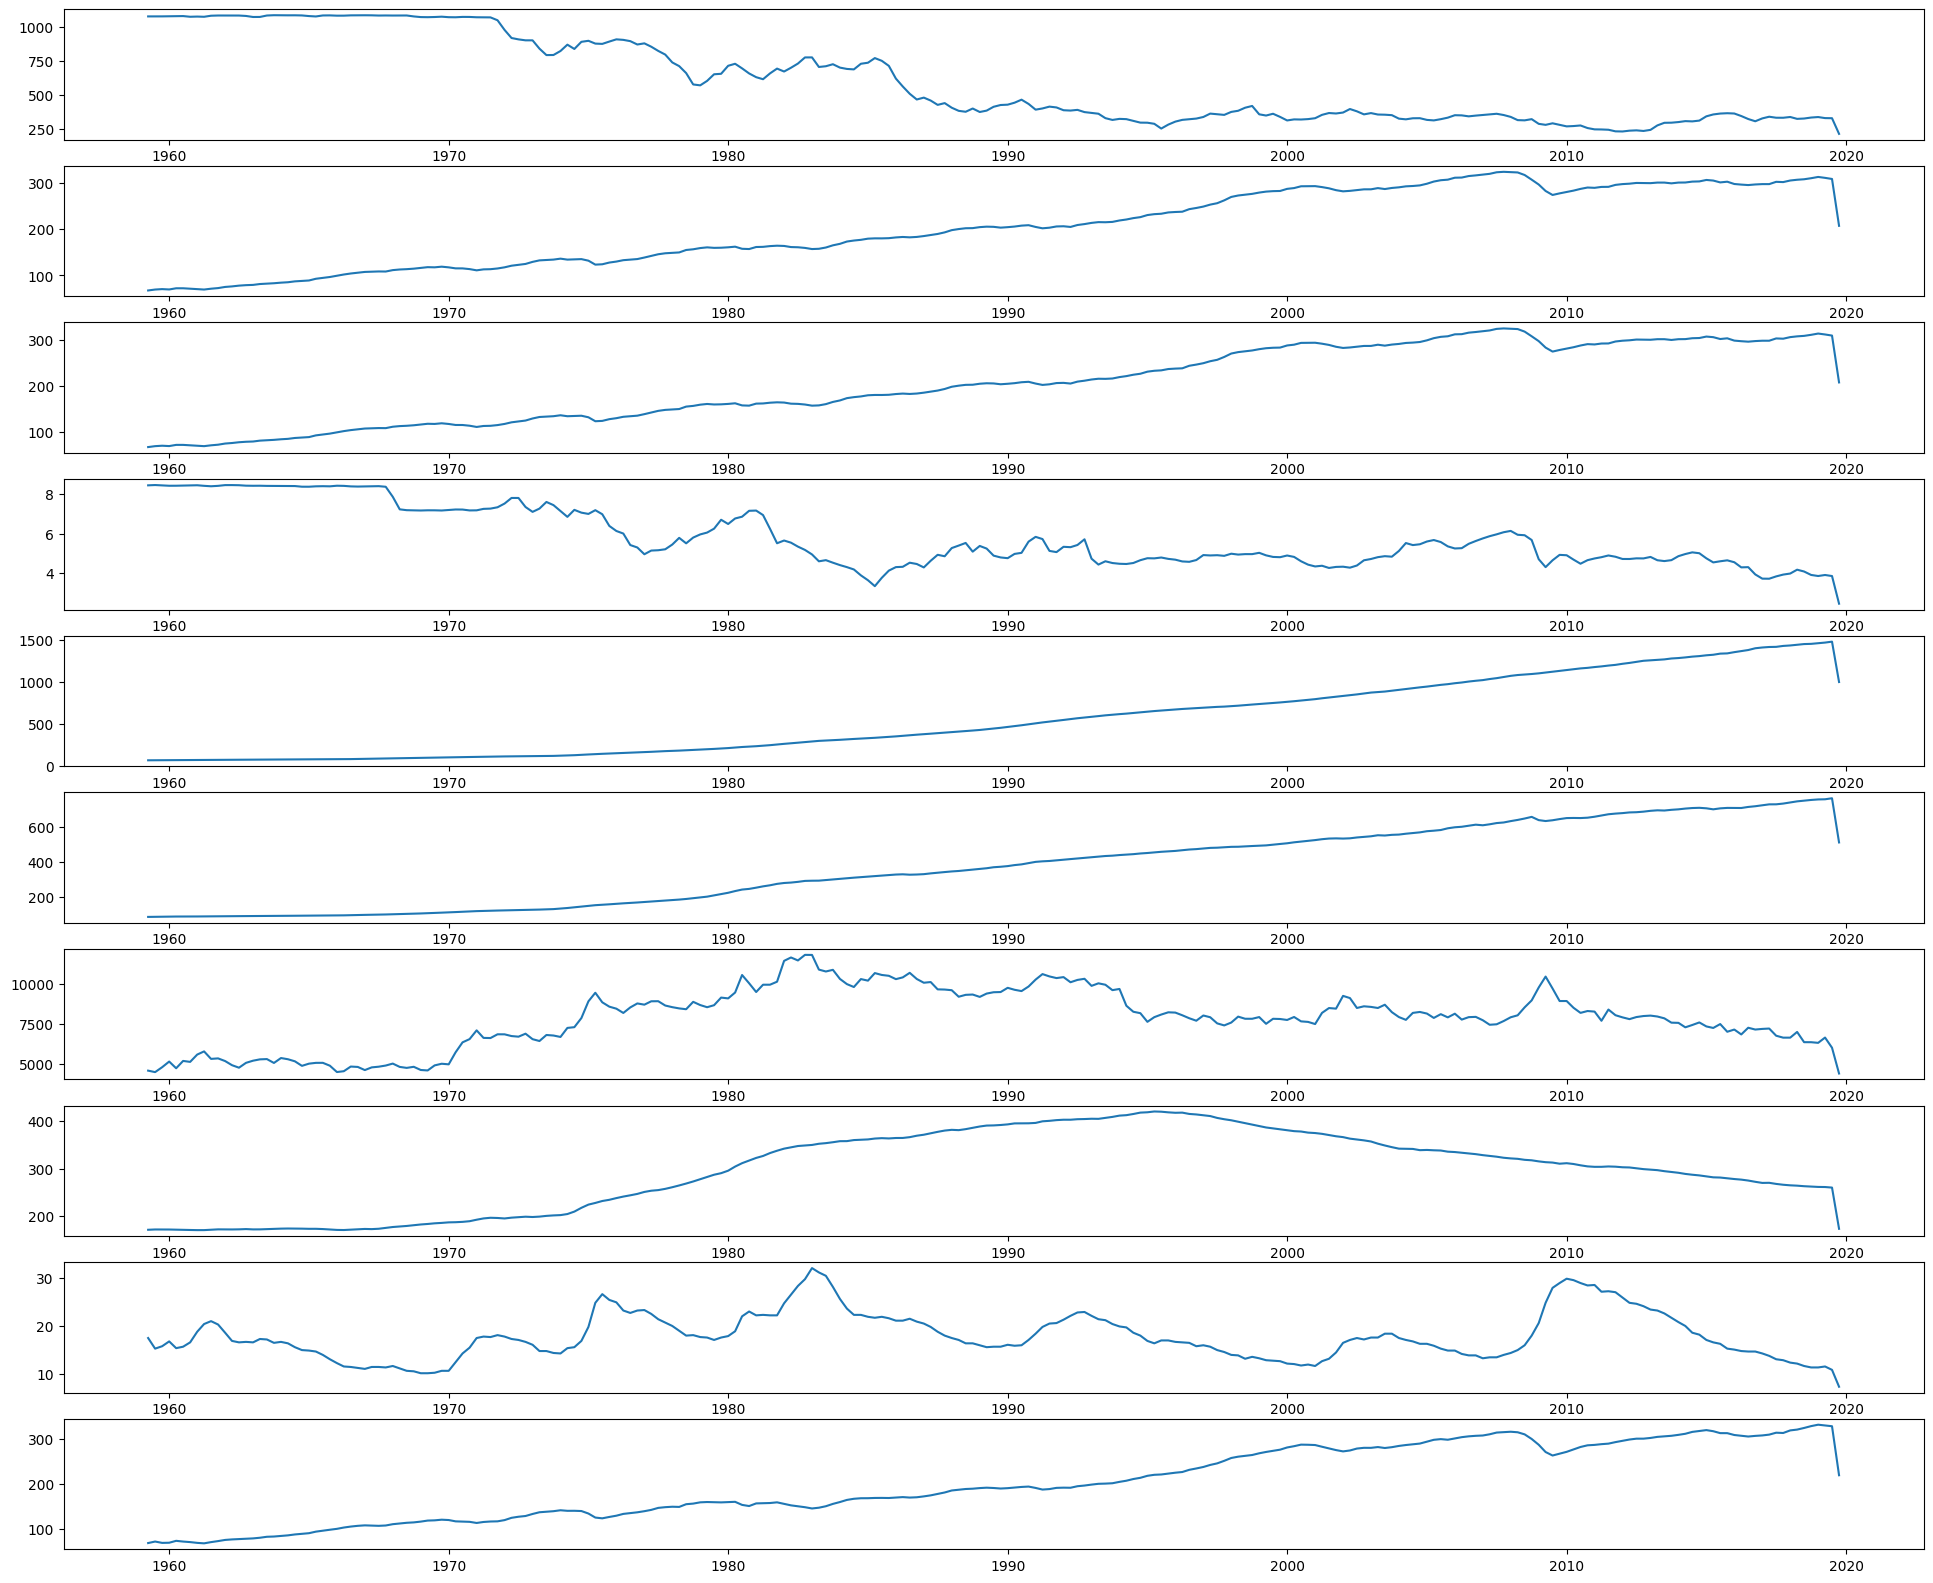

In [79]:
draw_resampled(fred_md, 'Q', 10)

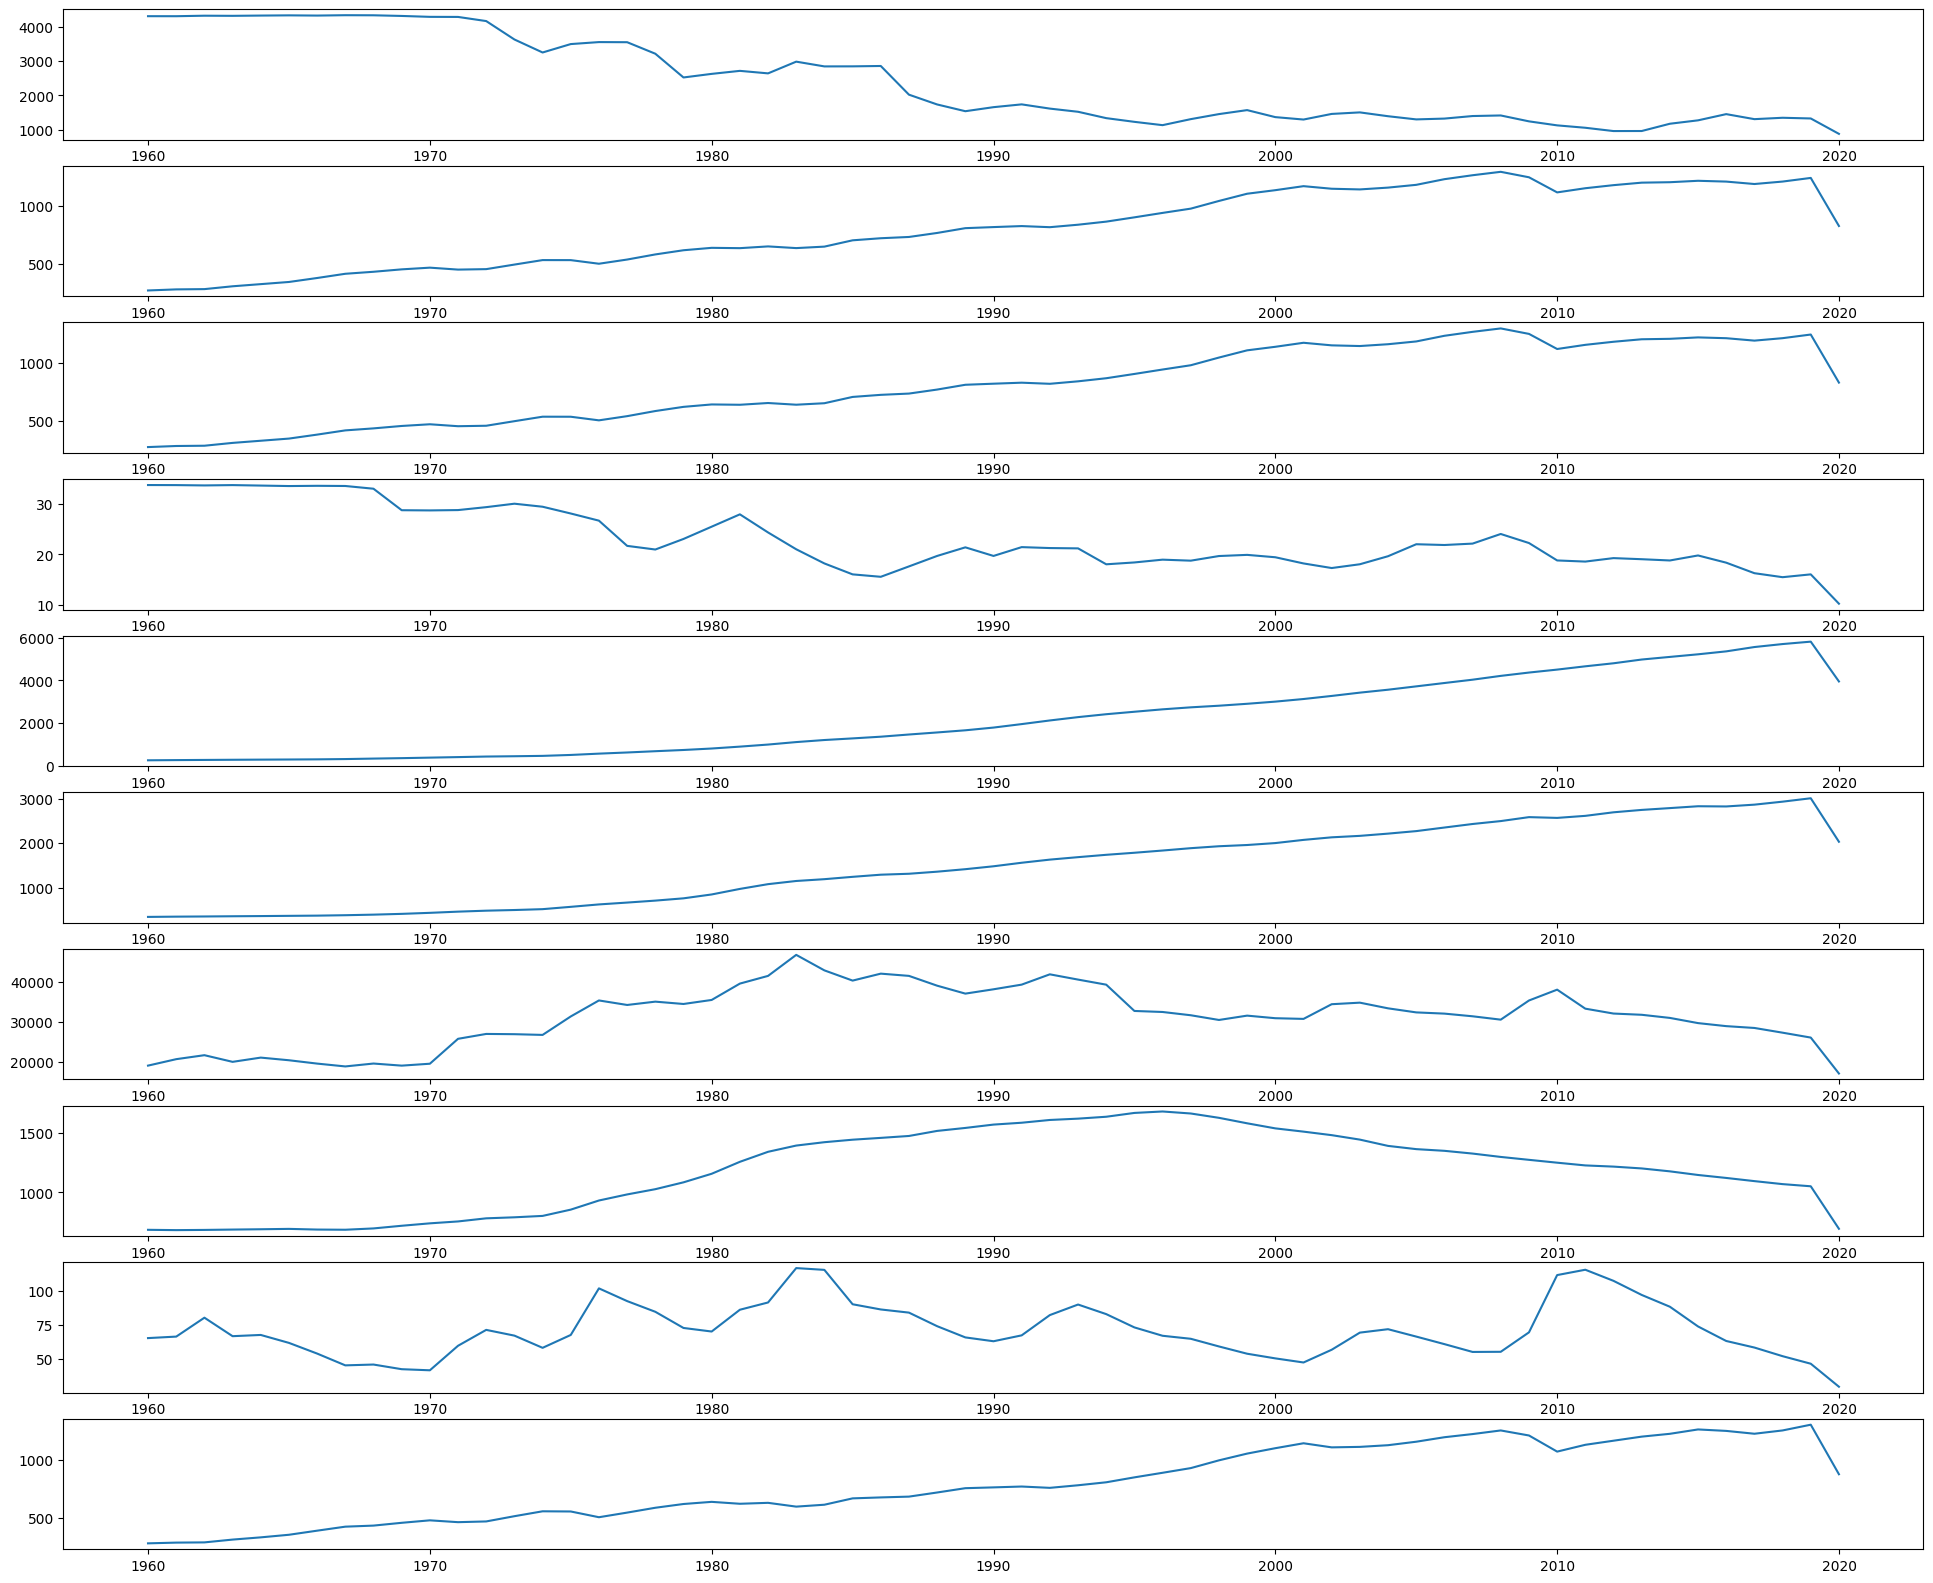

In [80]:
draw_resampled(fred_md, 'Y', 10)

Ряды разнородные. Наблюдается тренд, для сезонности нужен дальнейший анализ.

Попробуем покластеризовать ряды

In [86]:
fred_md_cluster = cluster_ts(fred_md, 4)

c:\Users\User\.conda\envs\educ_kernel\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


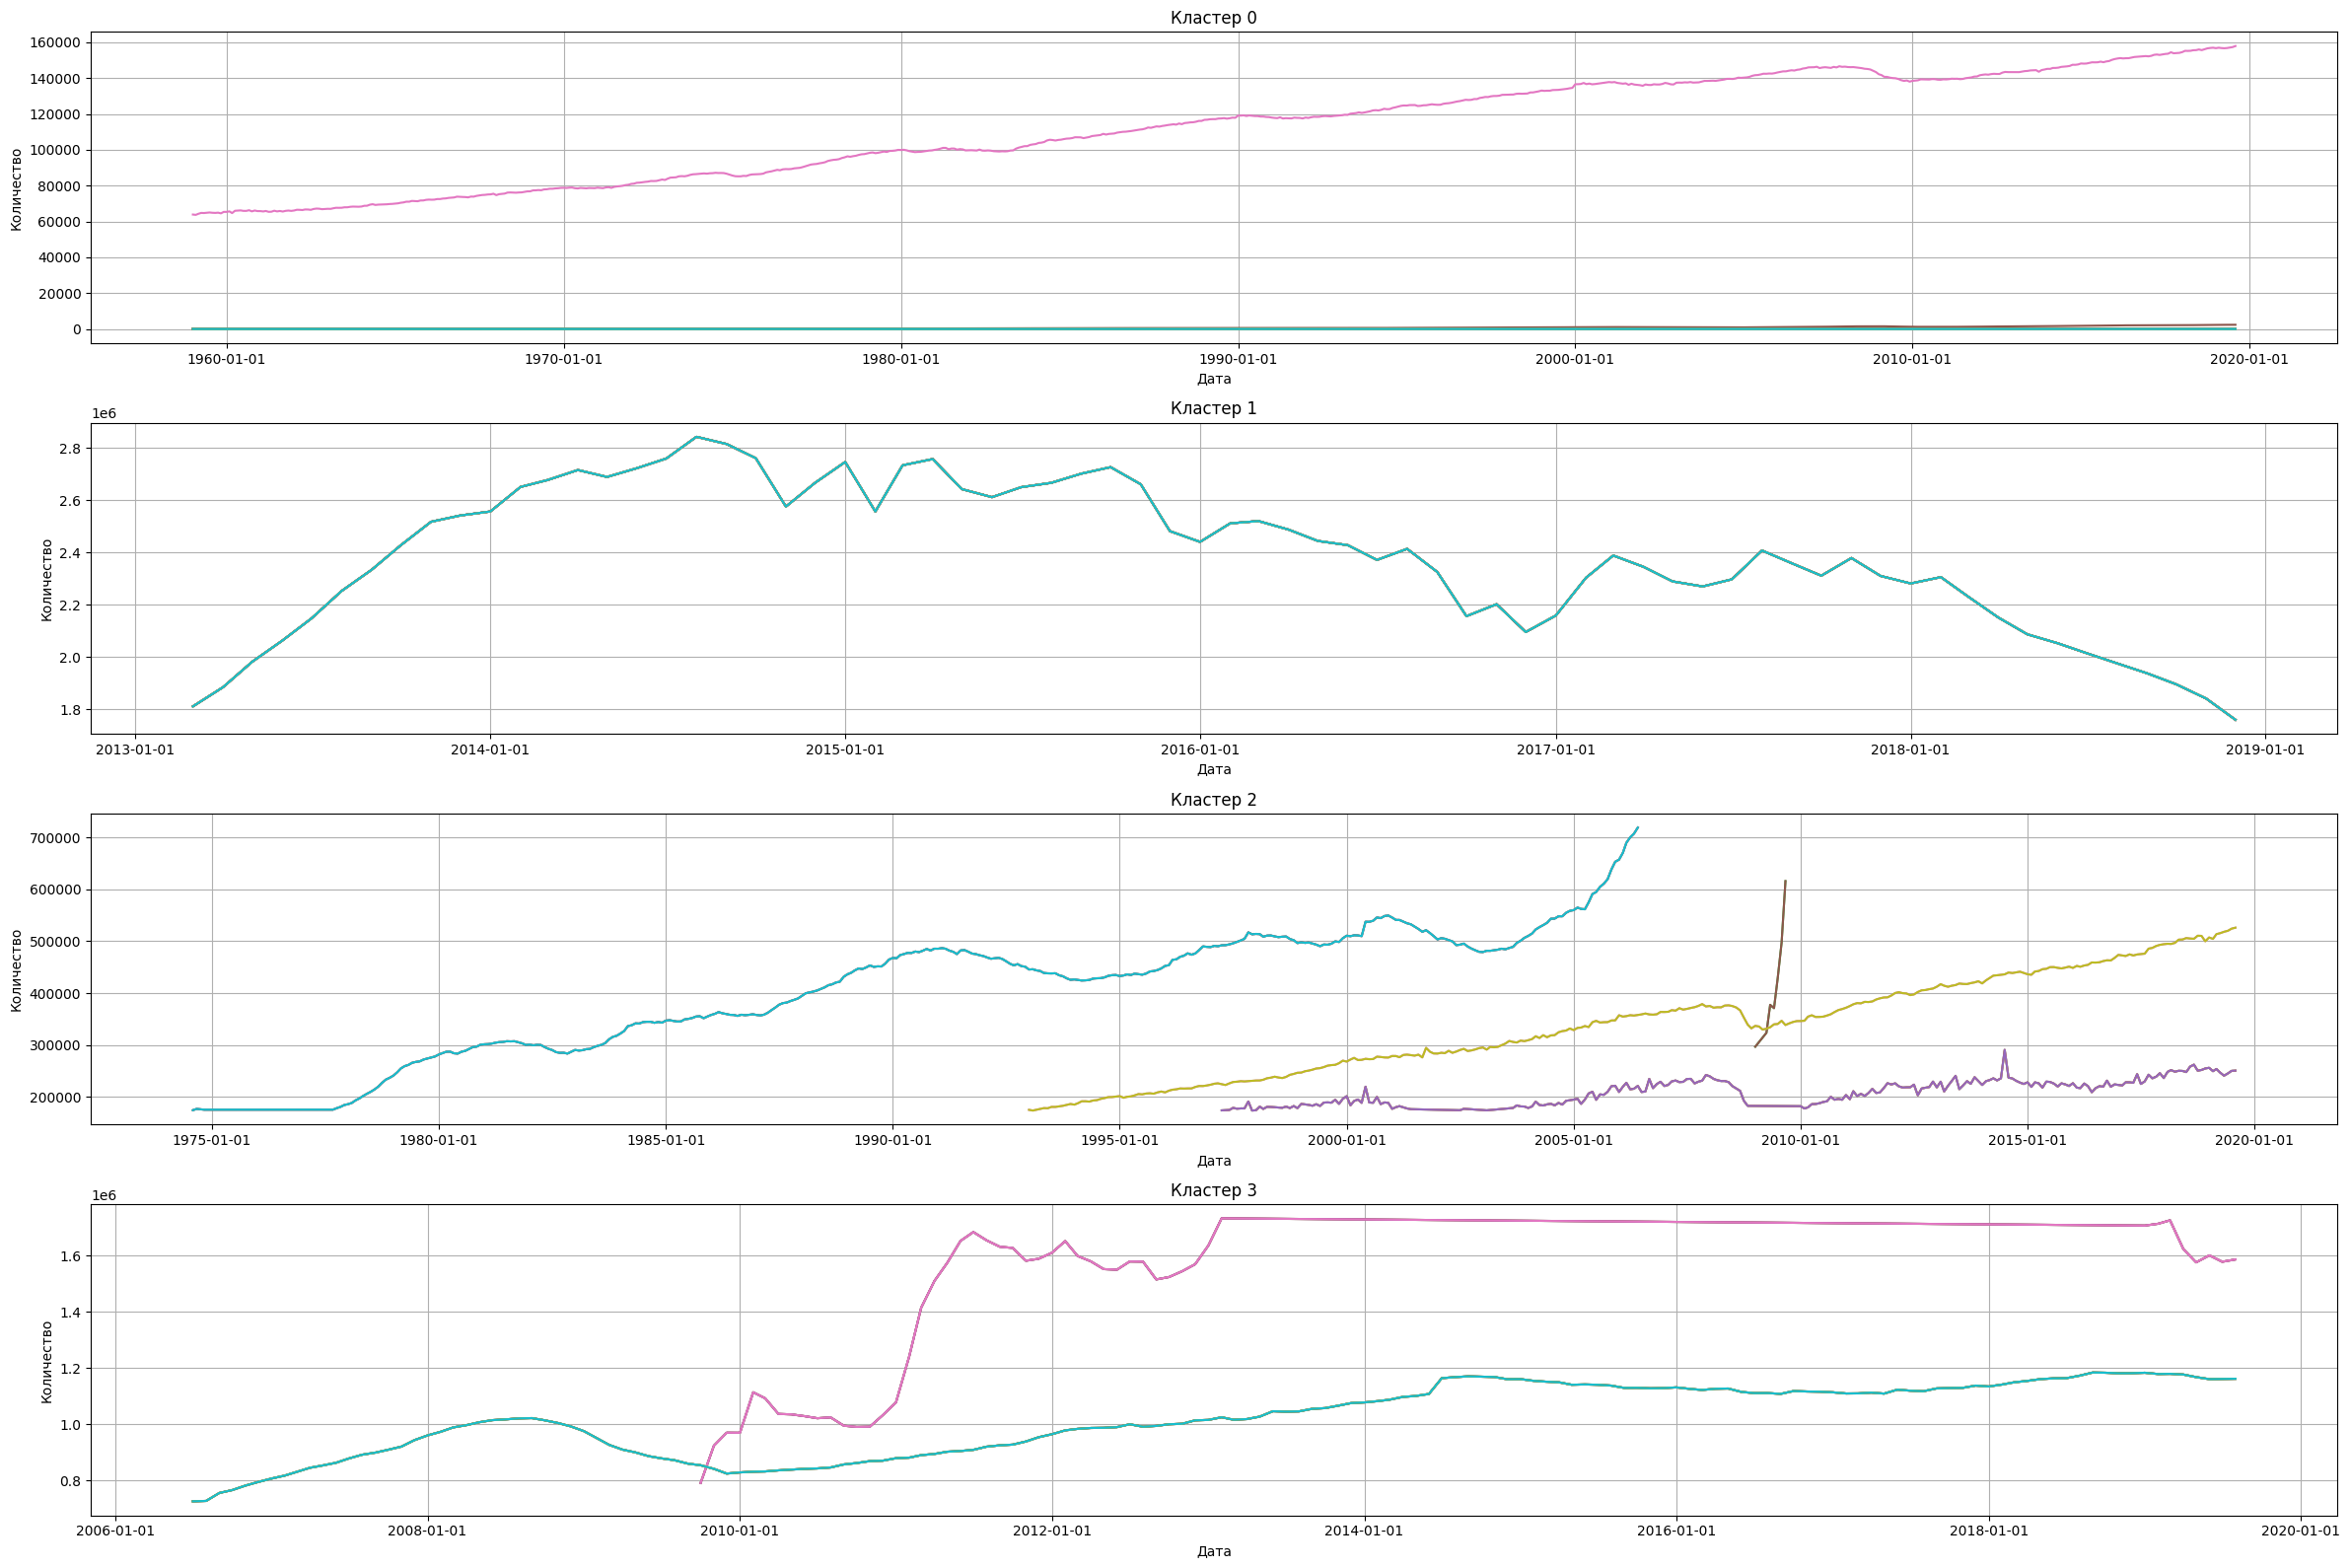

In [89]:
plot_clustered_series(fred_md_cluster, 4, n_series=10)

In [ ]:
# Perform Linear Regression and calculate the gradient/slope
lr_df = calculate_slope(ecl, location_col = 'id', quantity_col = 'value', location_list = ecl['id'].unique())
tau_df = calculate_tau(ecl, location_col = 'id', quantity_col = 'value', location_list = ecl['id'].unique())

In [ ]:
lr_df

,gradient,mae,mean,r2_score,mape
0,-0.000309,19.351207,23.263762,0.009441,0.831818
1,0.000034,19.954547,112.885569,0.000102,0.176768
2,-0.001710,17.271340,16.821624,0.069653,1.026734
3,0.004108,114.470068,440.335196,0.041788,0.259961
4,0.000781,54.766106,200.536724,0.007228,0.273098
...,...,...,...,...,...
316,-0.002585,199.992773,350.702137,0.006619,0.570264
317,-0.000313,28.331806,51.490344,0.004076,0.550235
318,-0.003115,411.118039,2264.188641,0.001881,0.181574
319,0.000269,224.822870,507.008858,0.000058,0.443430


In [ ]:
lr_df.sort_values("gradient", key = lambda x: abs(x), ascending=False)[['gradient']].iloc[:10].style.bar(subset = 'gradient',align='mid', color=['#d65f5f', '#5fba7d'])

,gradient
155,-0.370683
128,0.179217
182,-0.122809
131,-0.072856
314,-0.068558
313,-0.058298
119,-0.050906
296,-0.042101
55,0.039192
236,0.036674


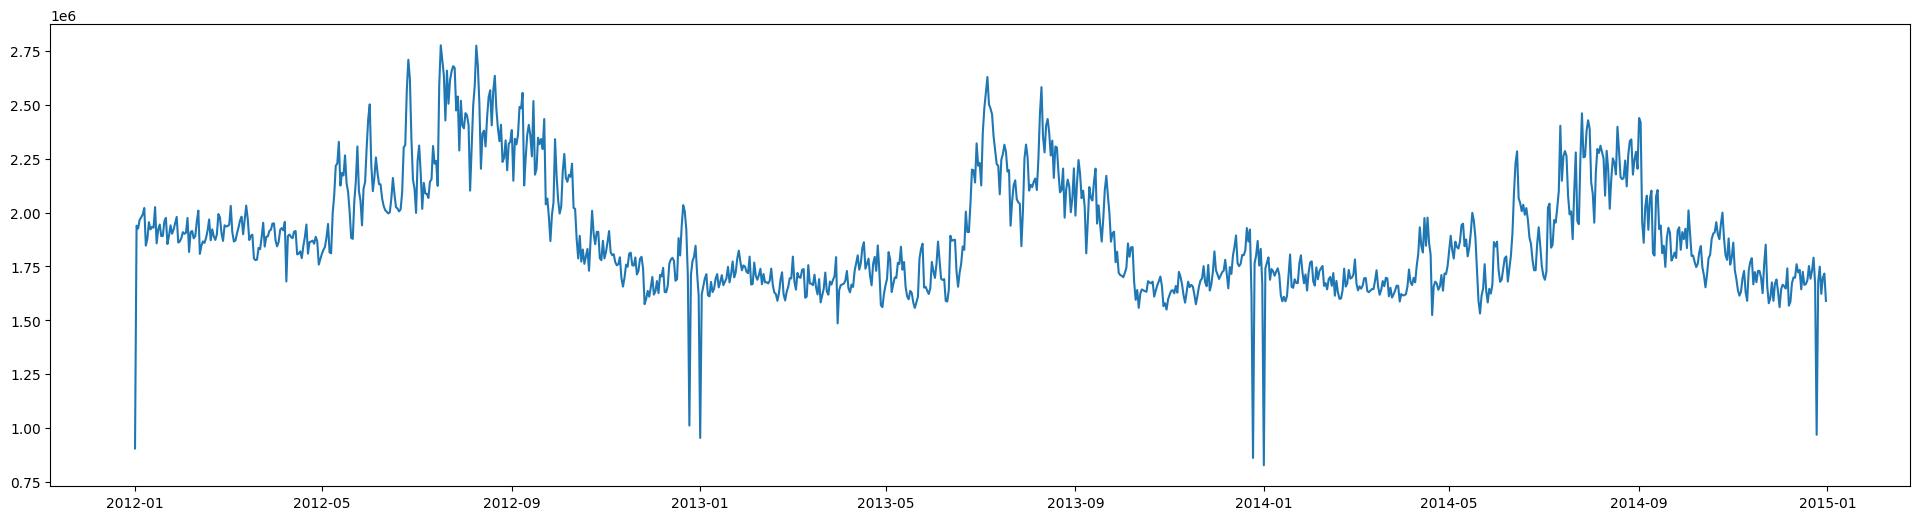

In [ ]:
draw_resampled(ecl[ecl['id'] == 155], 'D', 1)

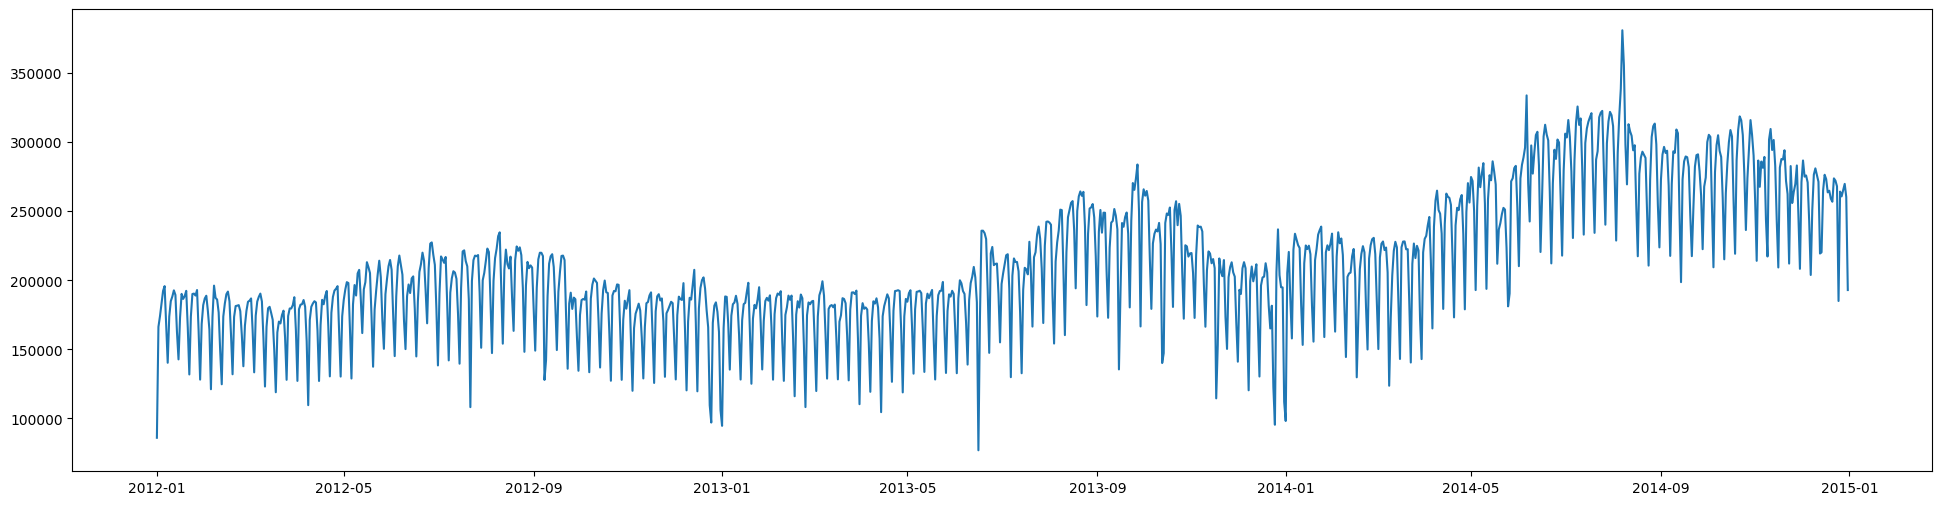

In [ ]:
draw_resampled(ecl[ecl['id'] == 128], 'D', 1)

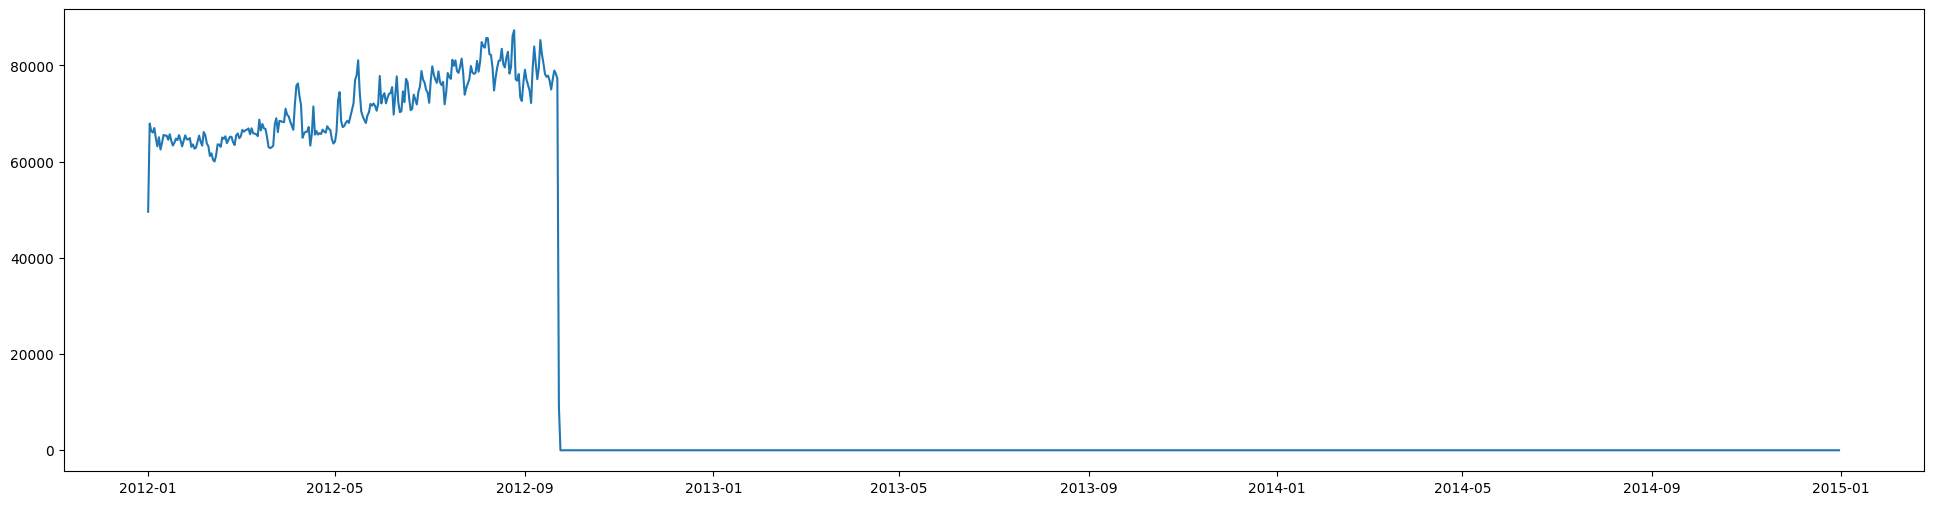

In [ ]:
draw_resampled(ecl[ecl['id'] == 182], 'D', 1)

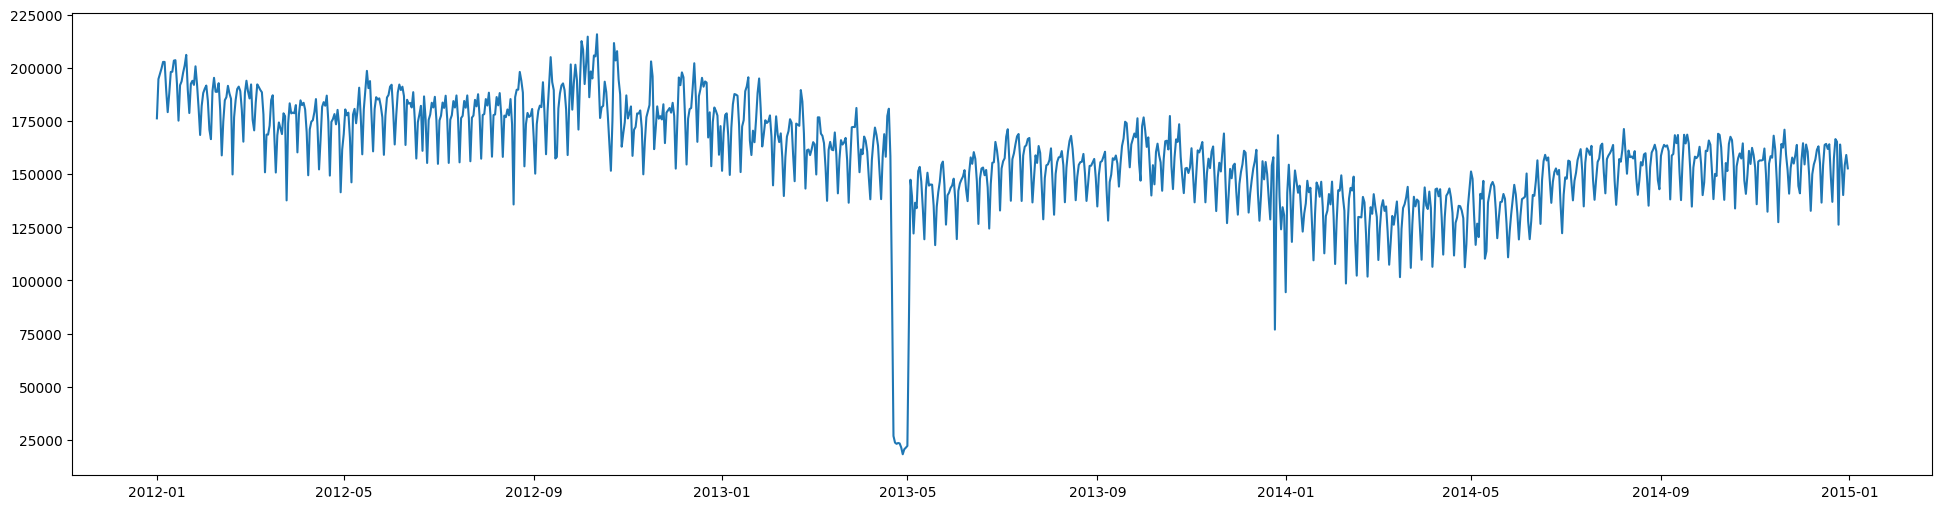

In [ ]:
draw_resampled(ecl[ecl['id'] == 131], 'D', 1)